#### Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

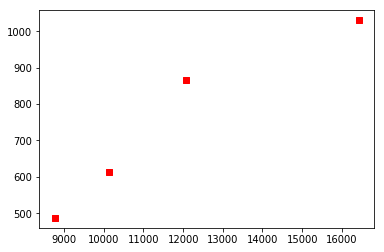

In [2]:
x_data = np.array([8759, 10132, 12078, 16430])
y_data = np.array([487, 612, 866, 1030])

plt.scatter(x_data, y_data, color = 'r', marker = 's')
plt.show()

In [3]:
weight_0 = np.random.sample(5)
weight_1 = np.random.sample(5)

In [4]:
y_hat_list = []
for w0, w1 in zip(weight_0, weight_1) :
    y_hat_list.append(w0 + w1*x_data)

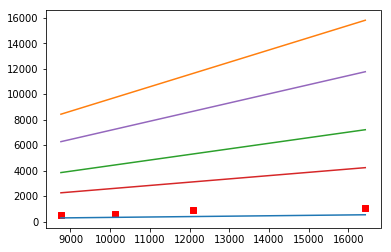

In [5]:
plt.scatter(x_data, y_data, color = 'r', marker = 's')
for y_hat in y_hat_list :
    plt.plot(x_data, y_hat)
plt.show()

#### Linear Regression with Gradient Descent

In [6]:
df = pd.read_csv('slr06.csv')
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [7]:
raw_X = df['X'].values.reshape(-1, 1)
y = df['Y'].values

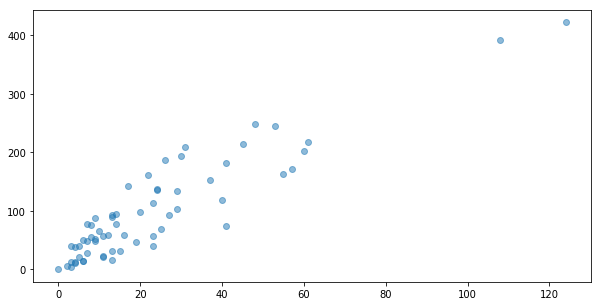

In [8]:
plt.figure(figsize = (10, 5))
plt.plot(raw_X, y, 'o', alpha = 0.5)

In [9]:
raw_X[:5], y[:5]

(array([[108],
        [ 19],
        [ 13],
        [124],
        [ 40]]), array([392.5,  46.2,  15.7, 422.2, 119.4]))

In [10]:
 np.ones((len(raw_X), 1))[:5]    # 상수항 추가

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [11]:
X = np.concatenate((np.ones((len(raw_X), 1)), raw_X), axis = 1)
X[:5]

array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.]])

In [12]:
w = np.random.normal((2, 1))
w

array([0.57771285, 2.35261283])

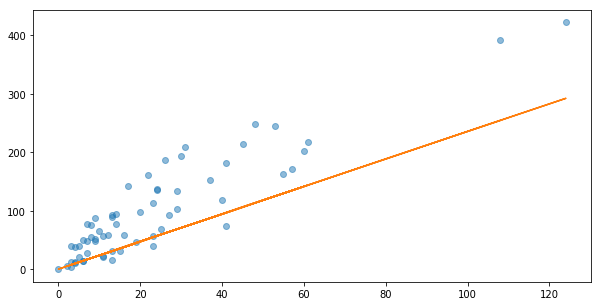

In [13]:
plt.figure(figsize = (10, 5))
plt.plot(raw_X, y, 'o', alpha = 0.5)

y_predict = np.dot(X, w)
plt.plot(raw_X, y_predict)

#### Hypothsis and Cost Function

In [14]:
def hypothesis_function(X, theta) :
    return X.dot(theta)

In [15]:
hypothesis_function(X, w)[:5]     # 예측치

array([254.65989887,  45.27735669,  31.16167969, 292.3017042 ,
        94.68222619])

In [16]:
def cost_function(h, y) :
    return(1/(2*len(y))) * np.sum((h-y)**2)

In [17]:
h = hypothesis_function(X, w)
cost_function(h, y)

1883.4288227663633

In [18]:
def gradient_descent(X, y, w, alpha, iterations) :
    theta = w
    m = len(y)
    
    theta_list = [theta.tolist()]
    cost = cost_function(hypothesis_function(X, theta), y)
    cost_list = [cost]
    
    for i in range(iterations) :
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:, 1])
        theta = np.array([t0, t1])      # t0와 t1을 계산한 이후 simutenous하게 theta를 업데이트
        
        if i % 10 == 0 :    # 10번 iter마다 theta와 cost 기록
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)
        
    return theta, theta_list, cost_list

In [19]:
iterations = 10000
alpha = 0.001
theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
cost = cost_function(hypothesis_function(X, theta), y)

print('theta :', theta)
print('cost :', cost_function(hypothesis_function(X, theta), y))

theta : [19.87093536  3.41649131]
cost : 625.3748241224648


In [20]:
theta_list[:10]

[[0.5777128515581069, 2.3526128334657863],
 [0.6214364034892292, 3.923597177860163],
 [0.7171675217042519, 3.83006657637303],
 [0.81437992320824, 3.827967530088297],
 [0.9111020982766962, 3.8258790689549373],
 [1.0073365190423342, 3.8238011395936704],
 [1.1030856451713036, 3.8217336888944704],
 [1.1983519239260545, 3.819676664015137],
 [1.2931377902278882, 3.817630012379945],
 [1.387445666719191, 3.8155936816783007]]

In [21]:
cost_list[:10]

[1883.4288227663633,
 724.7217505020154,
 719.3277820715605,
 718.3825533125371,
 717.4468337879874,
 716.5205278326674,
 715.603540743748,
 714.6957787711347,
 713.7971491078824,
 712.9075598807058]

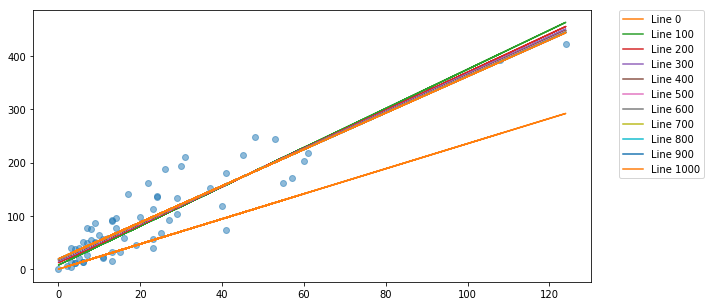

In [22]:
plt.figure(figsize = (10, 5))
theta_list = np.array(theta_list)
y_predict_step = np.dot(X, theta_list.transpose())
plt.plot(raw_X, y, 'o', alpha = 0.5)
for i in range(0, len(cost_list), 100) :
    plt.plot(raw_X, y_predict_step[:, i], label = 'Line %d' %i)

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()

In [29]:
from mpl_toolkits.mplot3d import Axes3D
ms = np.linspace(theta[0] - 15, theta[0] + 15, 100)
bs = np.linspace(theta[1] - 15, theta[1] + 15, 100)

M, B = np.meshgrid(ms, bs)
zs = np.array([cost_function(y, hypothesis_function(X, theta))
              for theta in zip(np.ravel(M), np.ravel(B))])
z = zs.reshape(M.shape)

In [ ]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(M, B, Z, rstride = 1, cstride = 1, color = 'b', alpha = 0.2)
ax.contour(M, B, Z, 10, color = 'b', alpha = 0.5, offset = 0, stride = 30)

ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Cost')
ax.view_init(elev = 30., azim = 30)
ax.plot([theta[0]], [theta[1]], [cost_list[-1]], markerfacecolor = 'r', markeredgecolor = 'r', marker = 'x')